In [61]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import zipfile
import seaborn as sns

### 데이터셋 압축해제

In [2]:
zip_file = zipfile.ZipFile('../zip/poketmon.zip')
zip_file.extractall('../csv/')

### EDA

In [2]:
df = pd.read_csv('../csv/Pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

<AxesSubplot:xlabel='Type 1', ylabel='count'>

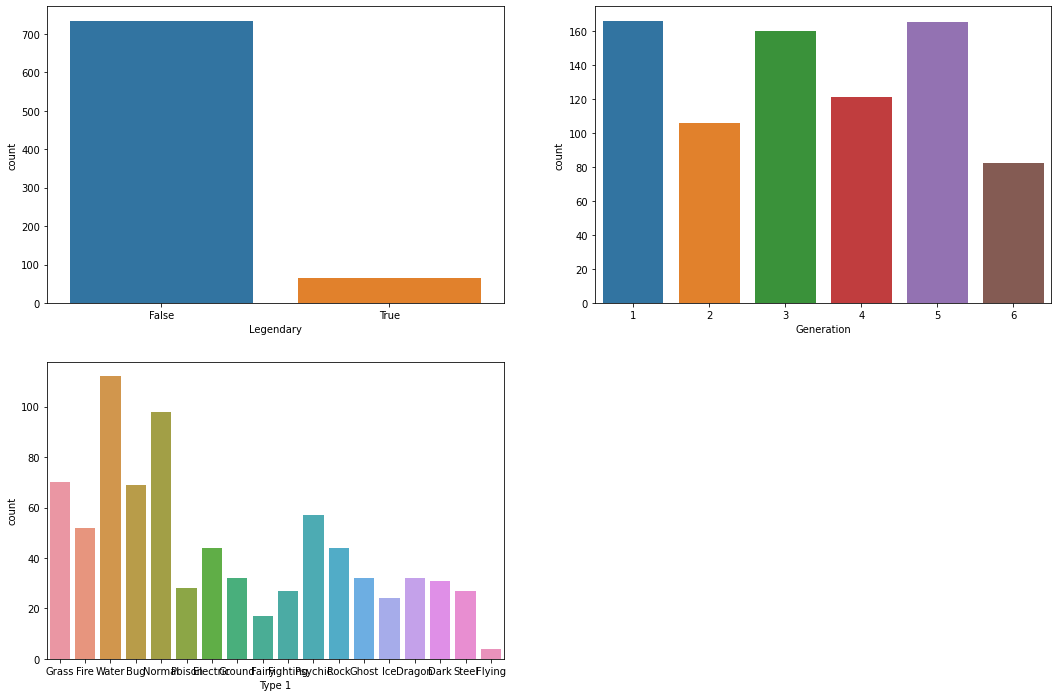

In [5]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.countplot(x=df['Legendary'])
plt.subplot(2, 2, 2)
sns.countplot(x=df['Generation'])
plt.subplot(2, 2, 3)
sns.countplot(x=df['Type 1'])

In [6]:
x_data = df.drop(columns=['Legendary'], axis=1)
x_data.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1


In [7]:
y_data = df[['Legendary']]
y_data.head()

,Legendary
0,False
1,False
2,False
3,False
4,False


In [8]:
df['Legendary'].head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

<AxesSubplot:>

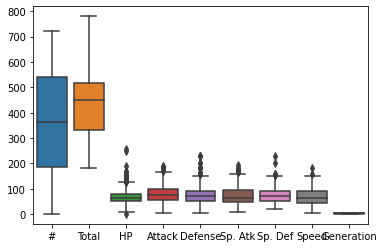

In [9]:
sns.boxplot(data=x_data)

In [10]:
x_data_new = x_data.drop(['Total', '#', 'Generation'], 1)

<AxesSubplot:>

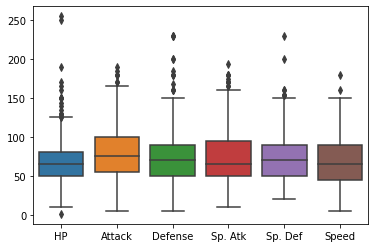

In [11]:
sns.boxplot(data=x_data_new)

### 데이터 형태 변경

In [12]:
x_data_new = pd.melt(x_data_new, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")

In [57]:
x_data_new.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.7% of

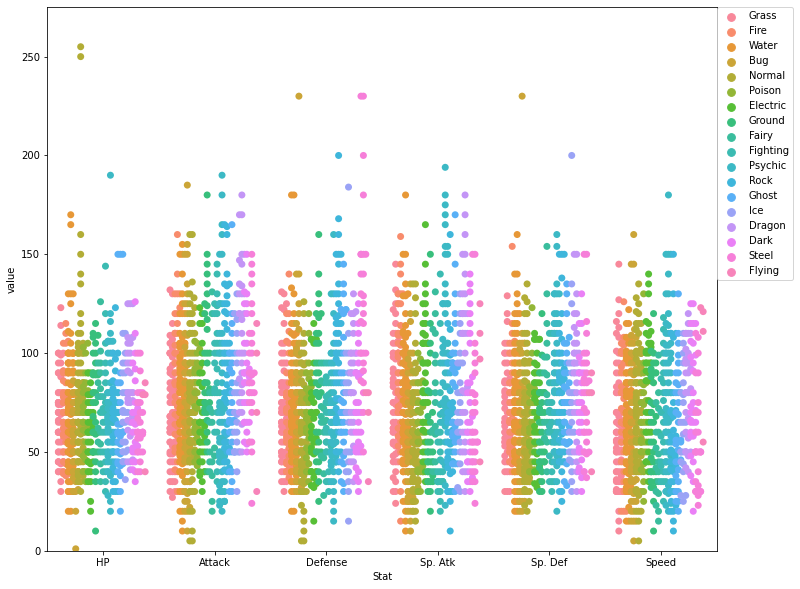

In [14]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 275)
sns.swarmplot(x="Stat", y="value", data=x_data_new, hue="Type 1", split=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

In [ ]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 275)
sns.swarmplot(x="Stat", y="value", data=x_data_new, hue="Type 1", split=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

In [15]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [16]:
df['Type 2'].fillna(df['Type 1'], inplace = True)

In [17]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [21]:
df.drop(['#'], 1, inplace=True)

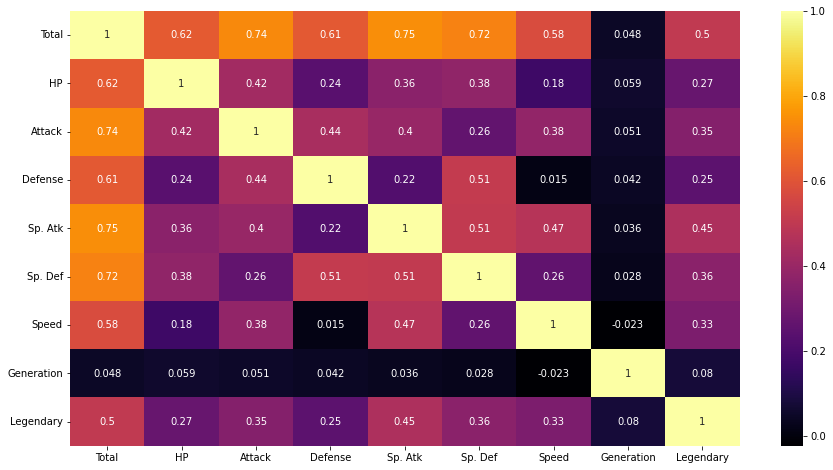

In [22]:
plt.figure(figsize=(15, 8))
corr=sns.heatmap(df.corr(), annot = True, cmap='inferno')
plt.show()

<AxesSubplot:xlabel='Type 2', ylabel='count'>

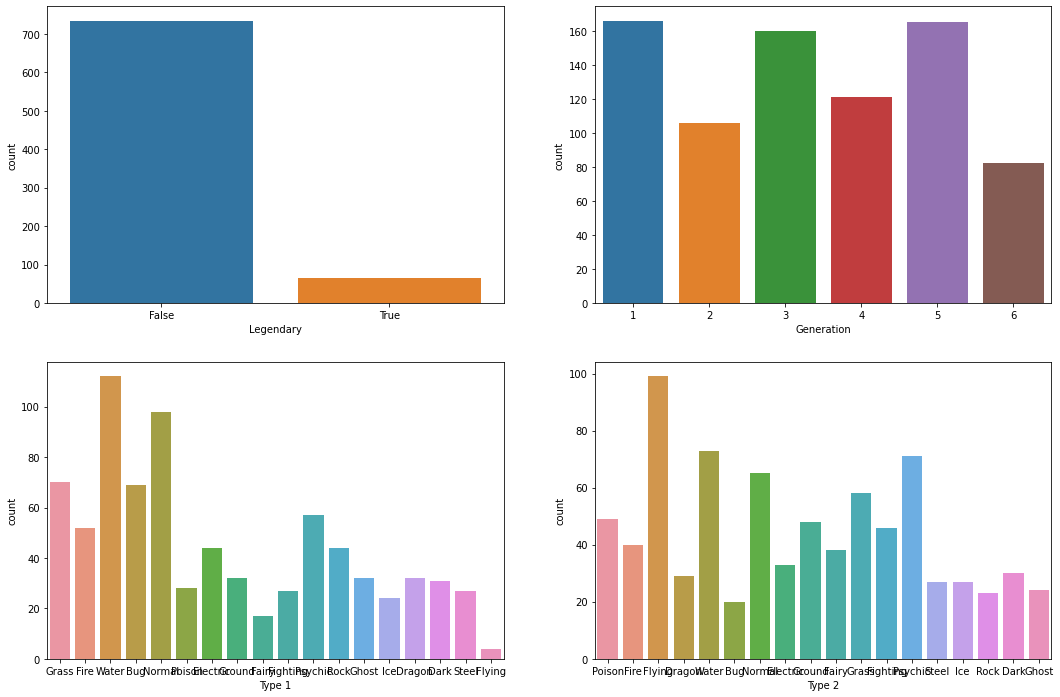

In [23]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.countplot(x=df['Legendary'])
plt.subplot(2, 2, 2)
sns.countplot(x=df['Generation'])
plt.subplot(2, 2, 3)
sns.countplot(x=df['Type 1'])
plt.subplot(2, 2, 4)
sns.countplot(x=df['Type 2'])

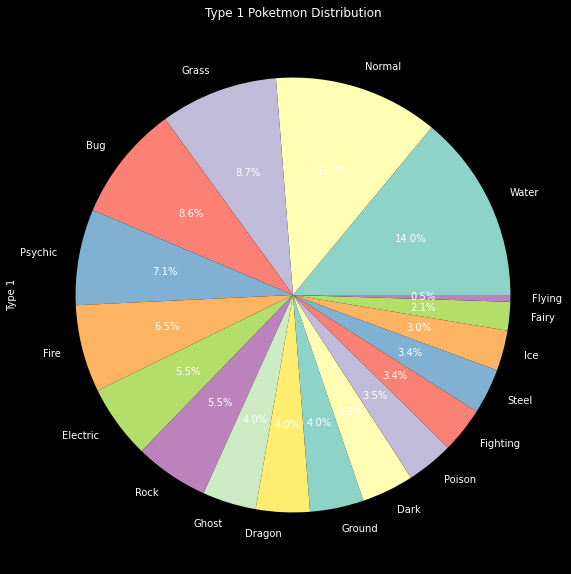

In [26]:
plt.style.use('dark_background')
plt.title("Type 1 Poketmon Distribution")
df['Type 1'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15,10))
plt.show()

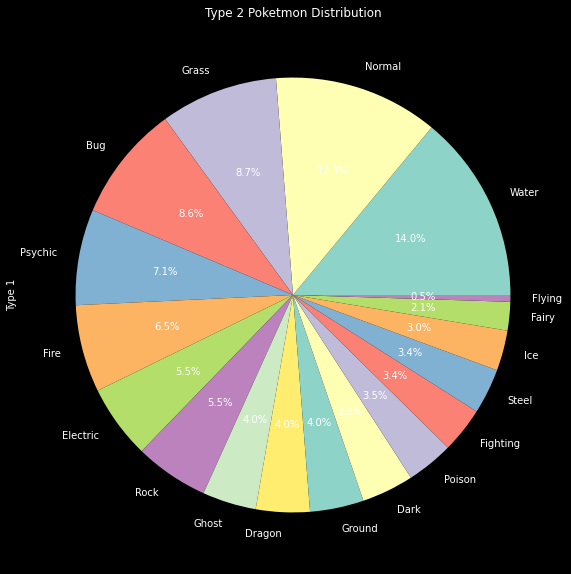

In [27]:
plt.style.use('dark_background')
plt.title("Type 2 Poketmon Distribution")
df['Type 1'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15,10))
plt.show()

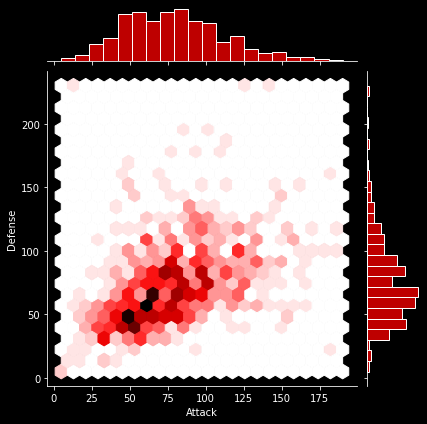

In [28]:
plt.Figure(figsize=(15, 8))
sns.jointplot(x="Attack", y="Defense", data=df, kind="hex", color="red")

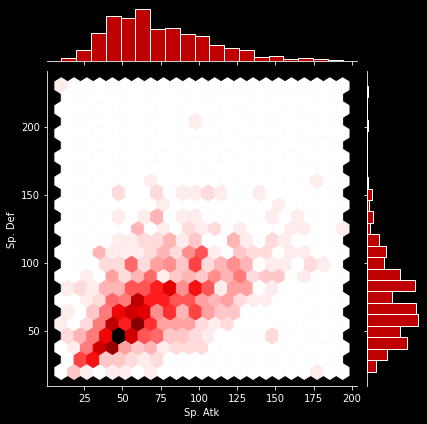

In [29]:
plt.Figure(figsize=(15, 8))
sns.jointplot(x="Sp. Atk", y="Sp. Def", data=df, kind="hex", color="red")

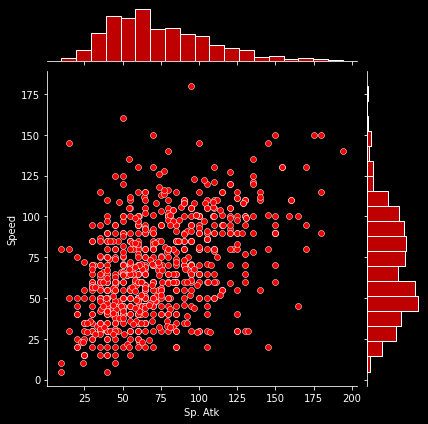

In [30]:
plt.Figure(figsize=(15, 8))
sns.jointplot(x="Sp. Atk", y="Speed", data=df, color="red")

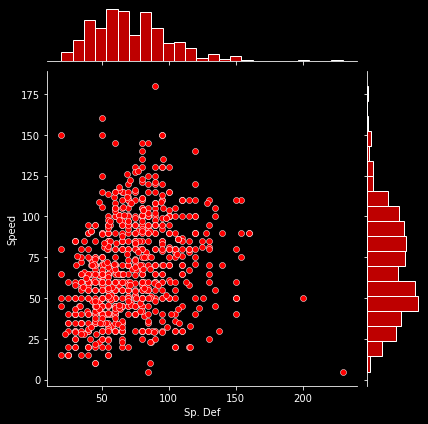

In [31]:
plt.Figure(figsize=(15, 8))
sns.jointplot(x="Sp. Def", y="Speed", data=df, color="red")

<AxesSubplot:xlabel='Generation', ylabel='Attack'>

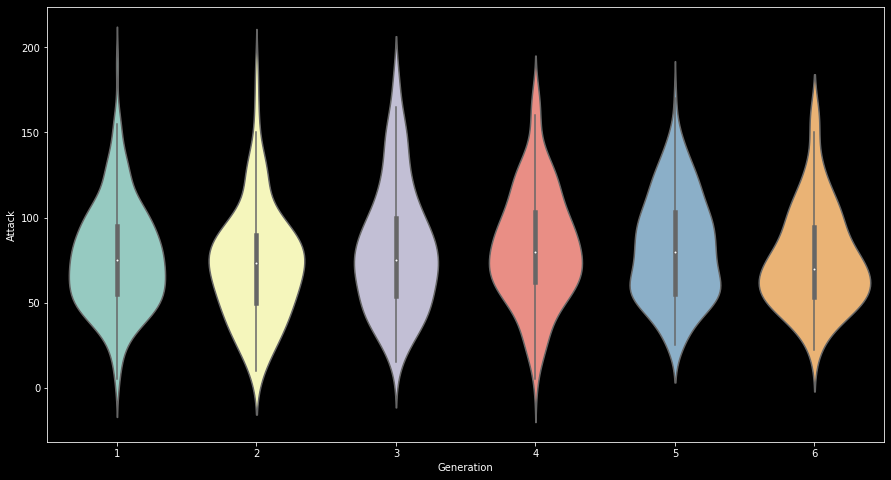

In [32]:
plt.figure(figsize=(15, 8))
sns.violinplot(x="Generation", y="Attack", data=df)

<AxesSubplot:xlabel='Generation', ylabel='Defense'>

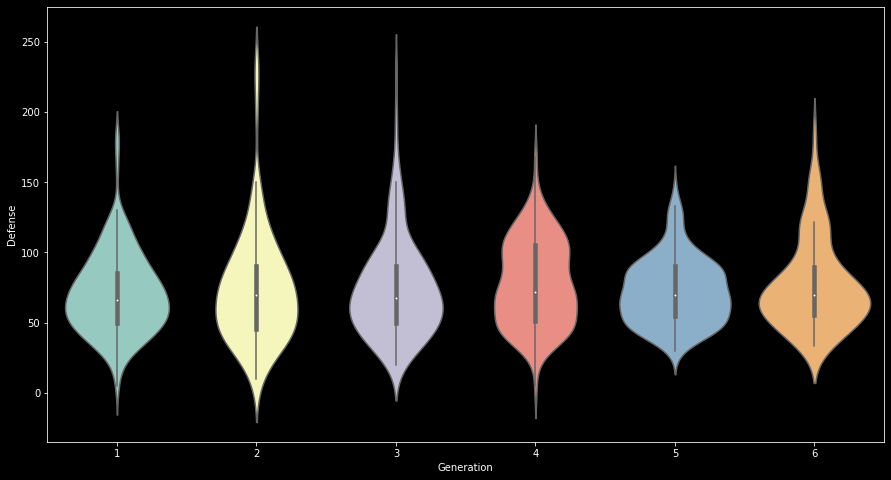

In [33]:
plt.figure(figsize=(15, 8))
sns.violinplot(x="Generation", y="Defense", data=df)

In [34]:
df[df['HP']>150][['Name', 'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Total']].sort_values(by = 'HP', ascending = False).head(5)

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
261,Blissey,Normal,255,10,10,75,135,55,2,540
121,Chansey,Normal,250,5,5,35,105,50,1,450
217,Wobbuffet,Psychic,190,33,58,33,58,33,2,405
351,Wailord,Water,170,90,45,90,45,60,3,500
655,Alomomola,Water,165,75,80,40,45,65,5,470


In [39]:
df[df['Attack']>150][['Name', 'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Total']].sort_values(by = 'Attack', ascending = False).head(5)

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
163,MewtwoMega Mewtwo X,Psychic,106,190,100,154,100,130,1,780
232,HeracrossMega Heracross,Bug,80,185,115,40,105,75,2,600
426,RayquazaMega Rayquaza,Dragon,105,180,100,180,100,115,3,780
424,GroudonPrimal Groudon,Ground,100,180,160,150,90,90,3,770
429,DeoxysAttack Forme,Psychic,50,180,20,180,20,150,3,600


In [42]:
df[df['Defense']>180][['Name', 'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Total']].sort_values(by = 'Defense', ascending = False).head(5)

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
224,SteelixMega Steelix,Steel,75,125,230,55,95,30,2,610
230,Shuckle,Bug,20,10,230,10,230,5,2,505
333,AggronMega Aggron,Steel,70,140,230,60,80,50,3,630
223,Steelix,Steel,75,85,200,55,65,30,2,510
414,Regirock,Rock,80,100,200,50,100,50,3,580


In [43]:
df[df['Speed']>130][['Name', 'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Total']].sort_values(by = 'Speed', ascending = False).head(5)

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
431,DeoxysSpeed Forme,Psychic,50,95,90,95,90,180,3,600
315,Ninjask,Bug,61,90,45,50,50,160,3,456
71,AlakazamMega Alakazam,Psychic,55,50,65,175,95,150,1,590
154,AerodactylMega Aerodactyl,Rock,80,135,85,70,95,150,1,615
428,DeoxysNormal Forme,Psychic,50,150,50,150,50,150,3,600


<AxesSubplot:xlabel='Type 1', ylabel='Total'>

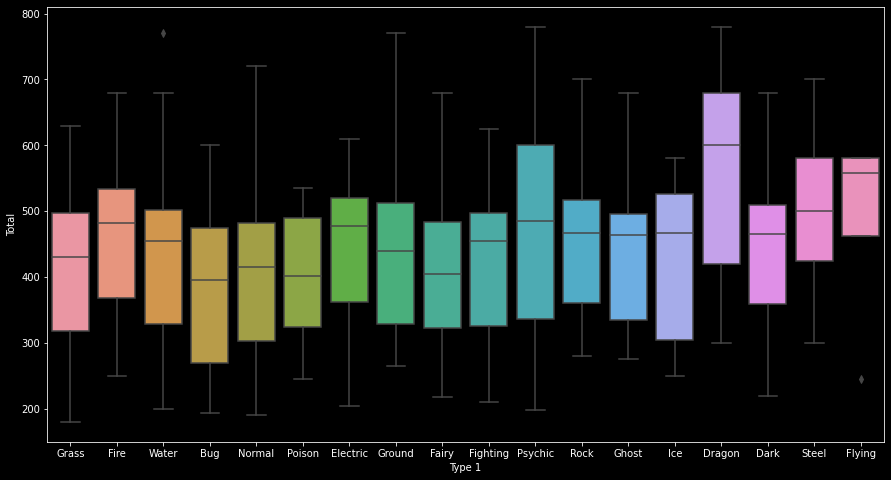

In [46]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = df['Type 1'], y = df['Total'])

<AxesSubplot:xlabel='Type 2', ylabel='Total'>

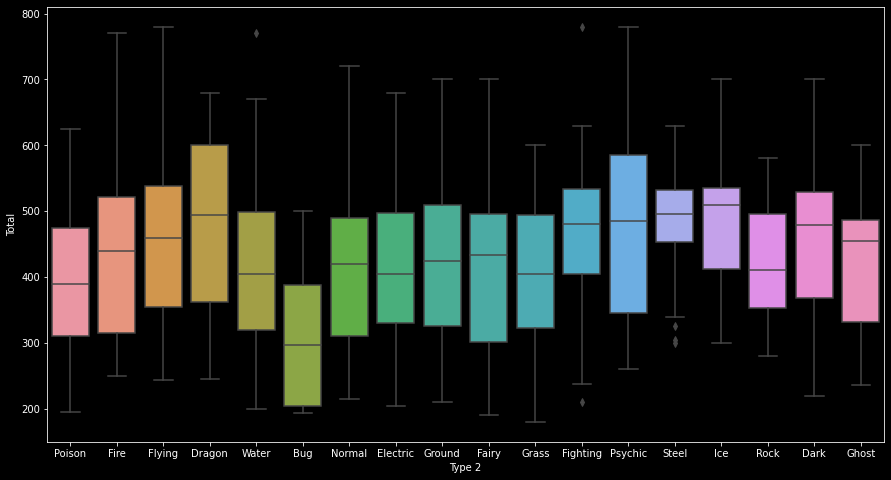

In [47]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = df['Type 2'], y = df['Total'])

In [49]:
legend = df[df["Legendary"]]
legend

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,Mewtwo,Psychic,Psychic,680,106,110,90,154,90,130,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


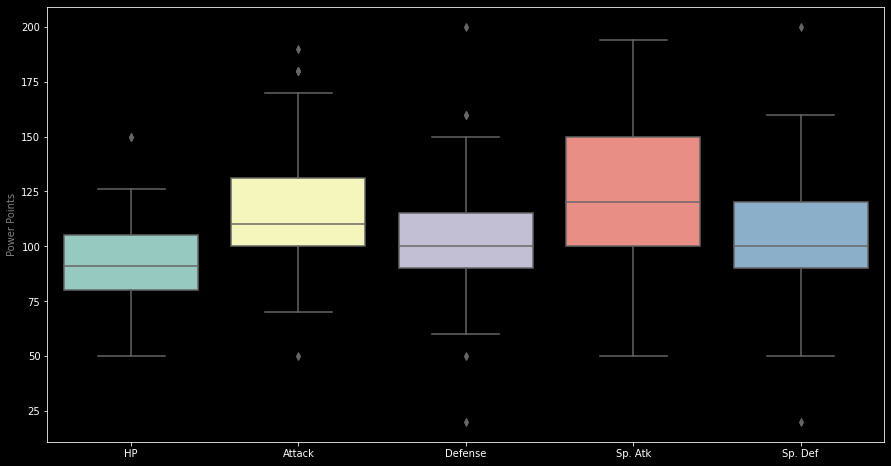

In [50]:
legend = df[df["Legendary"]]
legend = legend[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def"]]
fig = plt.figure(figsize = (15, 8))
sns.boxplot(data=legend)
plt.ylabel("Power Points", color="grey")
plt.show()

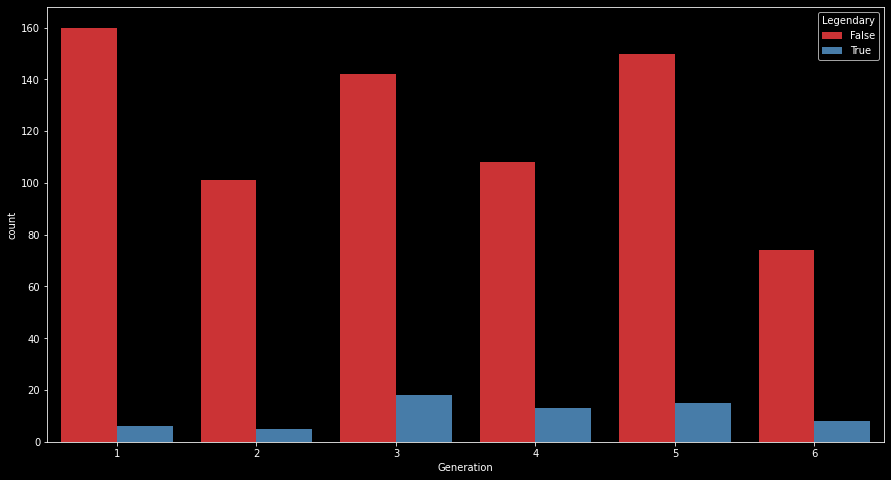

In [52]:
fig = plt.figure(figsize = (15, 8))
plot = sns.countplot(x = "Generation", data=df, hue="Legendary", palette="Set1")

In [59]:
def PoketmonFight(p1, p2, p3, p4, p5):
    x = df[df["Name"] == p1]
    trace1 = go.Scatterpolar(
        r = [x['HP'].values[0], x['Attack'].values[0], x['Defense'].values[0], x['Sp. Atk'].values[0], x['Sp. Def'].values[0], x['Speed'].values[0], x['HP'].values[0]],
        theta = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
        fill = 'toself',
        name = p1
    )
    x = df[df["Name"] == p2]
    trace2 = go.Scatterpolar(
        r = [x['HP'].values[0], x['Attack'].values[0], x['Defense'].values[0], x['Sp. Atk'].values[0], x['Sp. Def'].values[0], x['Speed'].values[0], x['HP'].values[0]],
        theta = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
        fill = 'toself',
        name = p2
    )
    x = df[df["Name"] == p3]
    trace3 = go.Scatterpolar(
        r = [x['HP'].values[0], x['Attack'].values[0], x['Defense'].values[0], x['Sp. Atk'].values[0], x['Sp. Def'].values[0], x['Speed'].values[0], x['HP'].values[0]],
        theta = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
        fill = 'toself',
        name = p3
    )
    x = df[df["Name"] == p4]
    trace4 = go.Scatterpolar(
        r = [x['HP'].values[0], x['Attack'].values[0], x['Defense'].values[0], x['Sp. Atk'].values[0], x['Sp. Def'].values[0], x['Speed'].values[0], x['HP'].values[0]],
        theta = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
        fill = 'toself',
        name = p4
    )
    x = df[df["Name"] == p5]
    trace5 = go.Scatterpolar(
        r = [x['HP'].values[0], x['Attack'].values[0], x['Defense'].values[0], x['Sp. Atk'].values[0], x['Sp. Def'].values[0], x['Speed'].values[0], x['HP'].values[0]],
        theta = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
        fill = 'toself',
        name = p5
    )
    
    layout = go.Layout(
        xaxis=dict(
            domain=[0, 0.45]
        ),
        yaxis=dict(
            domain=[0, 0.45]
        ),
        xaxis2=dict(
            domain=[0.55, 1]
        ),
        xaxis3=dict(
            domain=[0, 0.45],
            anchor='y3'
        ),
        xaxis4=dict(
            domain=[0.55, 1],
            anchor='y4'
        ),
        yaxis2=dict(
            domain=[0, 0.45],
            anchor='x2'
        ),
        yaxis4=dict(
            domain=[0.55, 1],
            anchor='x4'
        ),
        
        showlegend = True,
        title = "Poketmons' Performance"
    )
    
    data = [trace1, trace2, trace4, trace4, trace5]
    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig, filename = "Poketmon stats")

In [62]:
PoketmonFight("Raichu","Charizard","Venusaur","Blastoise","Blaziken")

In [75]:
#df_new = pd.get_dummies(df, columns=['fueltype', 'drivewheel', 'aspiration', 'doornumber', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

#df.drop(['Total', 'Name'], 1, inplace=True)
df_new = pd.get_dummies(df, columns=['Generation', 'Type 1', 'Type 2'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   HP               800 non-null    int64
 1   Attack           800 non-null    int64
 2   Defense          800 non-null    int64
 3   Sp. Atk          800 non-null    int64
 4   Sp. Def          800 non-null    int64
 5   Speed            800 non-null    int64
 6   Legendary        800 non-null    bool 
 7   Generation_1     800 non-null    uint8
 8   Generation_2     800 non-null    uint8
 9   Generation_3     800 non-null    uint8
 10  Generation_4     800 non-null    uint8
 11  Generation_5     800 non-null    uint8
 12  Generation_6     800 non-null    uint8
 13  Type 1_Bug       800 non-null    uint8
 14  Type 1_Dark      800 non-null    uint8
 15  Type 1_Dragon    800 non-null    uint8
 16  Type 1_Electric  800 non-null    uint8
 17  Type 1_Fairy     800 non-null    uint8
 18  Type 1_Fig

In [76]:
x_data = df_new.drop(columns=['Legendary'], axis=1)
x_data.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation_1,Generation_2,Generation_3,Generation_4,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,45,49,49,65,65,45,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,60,62,63,80,80,60,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,80,82,83,100,100,80,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,80,100,123,122,120,80,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,39,52,43,60,50,65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y_data = df_new[['Legendary']]
y_data = y_data.astype('int')
y_data.head()

,Legendary
0,0
1,0
2,0
3,0
4,0


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [102]:
y_test = y_test["Legendary"].values
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [94]:
y_train = y_train["Legendary"].values
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [79]:
from xgboost import XGBRFClassifier
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = XGBRFClassifier()
model.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

[00:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:13

[00:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:13

[00:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarni


[00:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
K-fold CV average score: 0.95


C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [80]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.978125
0.93125


In [97]:
model = XGBRFClassifier(use_label_encoder=False, eval_metric='logloss')
params = {
    'gamma' : [0.5, 1, 2, 5],
    'n_estimators' : [100, 200, 5000, 1000]
}

In [108]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 42)
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=50, scoring='roc_auc', cv=skf.split(X_train, y_train), verbose=10, random_state=42)
random_search.fit(X_train, y_train)

C:\Users\USER\anaconda3\envs\kg-study\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning:

The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START gamma=0.5, n_estimators=100................................
[CV 1/3; 1/16] END .gamma=0.5, n_estimators=100;, score=0.960 total time=   0.0s
[CV 2/3; 1/16] START gamma=0.5, n_estimators=100................................
[CV 2/3; 1/16] END .gamma=0.5, n_estimators=100;, score=0.961 total time=   0.0s
[CV 3/3; 1/16] START gamma=0.5, n_estimators=100................................
[CV 3/3; 1/16] END .gamma=0.5, n_estimators=100;, score=0.926 total time=   0.0s
[CV 1/3; 2/16] START gamma=0.5, n_estimators=200................................
[CV 1/3; 2/16] END .gamma=0.5, n_estimators=200;, score=0.960 total time=   0.0s
[CV 2/3; 2/16] START gamma=0.5, n_estimators=200................................
[CV 2/3; 2/16] END .gamma=0.5, n_estimators=200;, score=0.962 total time=   0.0s
[CV 3/3; 2/16] START gamma=0.5, n_estimators=200................................
[CV 3/3; 2/16] END .gamma=0.5, n_estimators=200;

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000029AEB856C00>,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None,
                                             enable_categorical=False,
                                             eval_metric='logloss', gamma=None,
                                             gpu_id=None, importance_type=None,
                                             interaction_constraints=None,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=No...
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='bina

In [109]:
print(random_search.best_estimator_)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False,
                eval_metric='logloss', gamma=0.5, gpu_id=-1,
                importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=5000, n_jobs=16,
                num_parallel_tree=5000, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)


In [110]:
print(random_search.best_estimator_.score(X_test, y_test))

0.9375
